In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools

In [102]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [5]:
from typing import Union, List, Tuple

# Index

This first notebook covers the following Graph Theory topics:

1. [Basic Defintions](#Basic-Definitions)
2. [The Euler and Mantel's Theorems](#The-Euler-and-Mantel's-Theorems)
3. [Graph Isomorphism](#Graph-Isomorphism)
4. [Cycle and Path graphs](#Cycle-and-Path-graphs)
5. [Subgraphs](#Subgraphs)
6. [Walks and Paths](#Walks-and-Paths)\
   6.1 [Depth-First Search Algorithm](#Depth-First-Search-Algorithm)
7. [Connectedness](#Connectedness)\
   7.1 [An example of Connected Components application](#An-example-of-Connected-Components-application)

# Introduction to Graph Theory and the `NetworkX` library

This notebook is an introduction to **<span style="color:blue">graph theory</span>**, a branch of mathematics that studies graphs — mathematical structures used to model pairwise relationships between objects. Graph theory has a vast number of applications in computer science and data science. Some examples include:

- **Routing and Network Design**: Graphs can represent computer networks, and graph-based algorithms can be used to find optimal routes for data transmission.
- **Social Networks**: Graphs are used to model interactions and relationships within social networks such as *Facebook* or *X*.
- **Data Science and AI**: Graphs often serve as mathematical structures to model data involving entities and their relationships — for instance, user-item interactions in recommender systems, or sentences and semantic relationships in NLP tasks.
  
In this notebook, we will introduce the basics of graph theory. Additionally, we will demonstrate how to model graphs in Python and apply key graph algorithms, with a hands-on exploration of `networkx`, one of the most popular Python packages for graph analysis.

## Basic Definitions

The first type of graph we will consider are the so-called **simple graphs**.

**Definition**: A **simple graph** or **graph** is a pair $(V,E)$, where $V$ is a finit set of elements called *vertices* (or *nodes* sometiems), and where $E$ is a subset of $P_2(V)$, where the latter is the set of all 2-element subsets of $V$.

In other words, a graph is a pair of two sets, one ($V$) is a finite set of elements, the other ($E$) is a set of all of subsets of $V$ consisting of 2 elements and therefore represents relations between elements of $V$. The purpose of simple graphs is thus that of encoding relations on a finite set. In particular, these relations are *binary* - because they relate pairs of elements - *symmetric* and *irreflexive* (i.e an element cannot be related to itself). As we shall see in the following, simple graphs are not the only kind of graphs we can define.
$V$ and $E$ are generally referred to as the **vertex set** and the **edge set** respectively. The edges, elements of $E$, are represented as $uv$ where $u, v \in V$. Of course we have $uv=vu$.

**Definition**: Two vertices $u, v \in V$ of a graph $G=(V, E)$ are said to be **adjacent** if $uv \in G$, that is $uv$ is an edge of $G$. 

In this case, $uv$ is said to "join" $u$ with $v$ (or to *connect* $u$ with $v$) and these vertices are called **endpoints** of this edge. 

**Definition**: Let $v$ a vertex of $G$. Then, the **neighbors** of $v$ are the vertices $u$ of $G$ that satisfy $vu \in E$, i.e. the vertices of $G$ that are adjacent to $v$. 

As an example, let consider the following simple graph:
$$
G = (\{a, b, c\}, \{\{a, b\}, \{a, c\}\})
$$
Then, its vertex and edge sets are:
$$
\begin{gather}
V = \{ a, b, c\} \\
E = \{\{a, b\}, \{a, c\}\} = \{ ab, ac \}
\end{gather}
$$
The vertices $a$ and $b$ are adjacent, since $ab \in E$, instead $b$ and $c$ are not adjaced since $bc \notin E$. 

A simple graph $G$ can be visually represented by drawing it on the plane. To do so, we can represent each vertex as a point and each edge as a line/curve connecting the corresponding endpoints:

![Graph-Example](../images/graph-example.png)

These basic definitions are sufficient to build our first simple graph using `networkx`. Indeed, to define a graph in Python with `networkx` we first to proceed as follows:
1. Define an instance of the `Graph` class, which represent simple graphs;
2. Start adding vertices/nodes and edges using class methods such as `.add_node()` or `.add_edge` (or `.add_nodes_from()` and `.add_edges_from()` in case of iterables)
As an example, let try to recreate the graph represented above:

In [6]:
# define a graph
graph_example = nx.Graph()

In [7]:
# Adding the first node:
graph_example.add_node(1)

Nodes and edges are saved as class attributes and they can be shown/printed as follows:

In [8]:
# See availables nodes
graph_example.nodes

NodeView((1,))

In [9]:
# Adding nodes from a list
graph_example.add_nodes_from([2, 3, 4, 5, 6])

In [10]:
graph_example.nodes

NodeView((1, 2, 3, 4, 5, 6))

In [11]:
# Adding edges, again using .add_edges_from() 
edges_example = [(1, 4), (2, 4), (3, 4), (4, 5), (5, 6)]
graph_example.add_edges_from(edges_example)

In [12]:
graph_example.edges

EdgeView([(1, 4), (2, 4), (3, 4), (4, 5), (5, 6)])

`networkx` has a powerful native integration with `matplotlib`, the most popular Python package for creating plots and visuals. The code snippet below allows creating a matplotlib plot to visualize a graph:

In [13]:
def plot_simple_graph(G: nx.Graph, **kwargs):
    '''
    Function to visualize a NetWorkx Graph

    Args:
        G (nx.Graph): a Networkx simple Graph
        kwargs (optional keyword arguments): additional arguments to customize the visualization

    Returns:
        The graph visualization
    '''
    fig, ax = plt.subplots(figsize=(4, 4))

    ax.set_title("Graph Visual", fontsize=12)
    nx.draw_networkx(G, **kwargs)

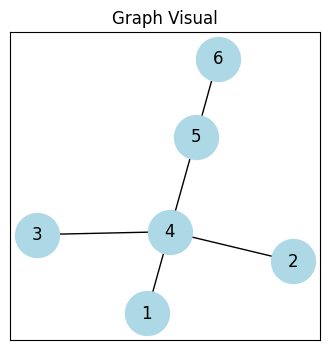

In [14]:
plot_simple_graph(
    graph_example, 
    node_color="lightblue",
    node_size=1000
)

**Definition**: Let $G=(V, E)$ be a simple graph. Let $v \in V$ be a vertex. Then, the **degree** of $v$ is defined as:
$$
\deg v := |\{ u \in V | uv \in E\} | = | \{ e \in E | v \in E \}|
$$
i.e., the degree of a vertex is the number of neighbors of $v$ or, equivalently, the number of edges $e$ that contain $v$. 

For example, in the above graph, the degree of the vertex "4" is 4, $\deg 4 = 4$, since there are four neighbors of 4, namely $(1, 2, 3, 5)$. Writing a Python function that compute the degree of a vertex in given graph is pretty simple: we simply need to check and count edges containing that vertex. 

In [15]:
def get_vertex_degree(G, v: Union[List[Union[str, int]], str, int]) -> dict:
    '''
    Function returning the degree of v in G

    Args:
        G (graph): a networkx graph
        v (List|str|int): a vertex/node in G or a list of vertex in G

    Returns:
        A dictionary with deg(v) 
    '''

    def __get_degree(v_i, e):
        '''
        Get the degree of vertex v_i, given edges e
        '''
        return len([True for x in e if v_i in x])
    
    if isinstance(v, (str, int)):  # If v is a string or an integer
        v = [v]  # Convert to a single-element list
    elif isinstance(v, list):  # If v is a list
        # Ensure all elements are either strings or integers
        if not all(isinstance(s, (str, int)) for s in v):
            raise ValueError("v must be either a list of strings/integers, or a single string/integer")
    else:
        raise ValueError("v must be either a list of strings/integers, or a single string/integer")

    # Check that each v in G:
    G_nodes = list(G.nodes)
    G_edges = list(G.edges)
    
    if all([True if x in v else False for x in G_nodes]):
        return { v_i: __get_degree(v_i, G_edges) for v_i in G_nodes }
    else:
        raise ValueError("All nodes MUST belong to the graph!")

In [16]:
get_vertex_degree(graph_example, list(graph_example.nodes))

{1: 1, 2: 1, 3: 1, 4: 4, 5: 2, 6: 1}

Of course, networkX already implements methods to compute the degree of a vertex, so in real applicatons we don't need to use the above function. In particular, given a networkx graph object we can call the method `.degree([])`, passing the interested node as input to compute its degree:

*Note*: notice that *edges*, *nodes*, *degree*, etc. of networkx graphs are set-like read-only views. 

In [17]:
graph_example.degree([4])

DegreeView({4: 4})

The library provides also a `.adj` class attributes listing node neighbors:

In [18]:
list(graph_example.adj[4])

[1, 2, 3, 5]

## The Euler and Mantel's Theorems

Let's state and prove some basic results in graph theory involving simple graphs. First of all we have the following:

**Preposition**: Let $G$ be a simple graph with $n$ vertices. Then, given $v \in V$, it holds $\deg v \leq (n-1)$.

This is a very simple result following by the definition of degree itself: the degree of $v$ is the number of neighbors of $v$; if $G$ has $n$ nodes then all neighbors of $v$ belong to the $(n-1)$-element subset of $V$ (i.e. $V / \{v\}$).
The following theorem is an importat result due to Euler (1736) which relates vertex degrees with the number of edges. 

**Theorem (Euler)**: Let $G$ be a simple graph. Then, the following formula holds:
$$
\sum_{v \in V} \deg v = 2 \cdot | E |
$$

In other words, the sum of degrees of all vertices of a simple graph $G$ equals twice the number of edges of $G$. Before proving this statement, let define some graphs and verify explicitly this formula.

In [19]:
# G1 
G1 = nx.Graph()
G1.add_nodes_from(["a", "b", "c", "d"])
G1.add_edges_from([("a", "b"), ("c", "d"), ("d", "b"), ("b", "a"), ("a", "c")])

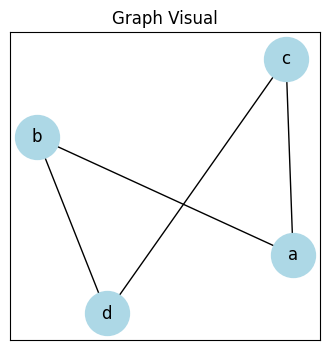

In [20]:
plot_simple_graph(
    G1, 
    node_color="lightblue",
    node_size=1000
)

In [21]:
# G2 
G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3, 4])
G2.add_edges_from([(1, 3), (3, 2), (3, 4), (2, 4)])

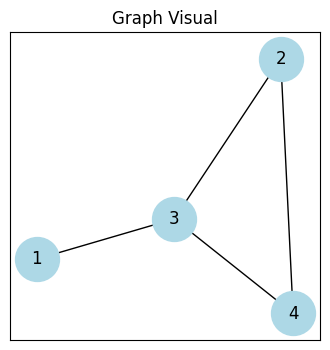

In [22]:
plot_simple_graph(
    G2, 
    node_color="lightblue",
    node_size=1000
)

In [23]:
# G3
G3 = nx.Graph()
G3.add_nodes_from([1, 2, 3, 4, 5])
G3.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (2, 5)])

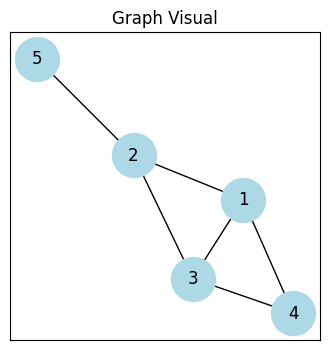

In [24]:
plot_simple_graph(
    G3, 
    node_color="lightblue",
    node_size=1000
)

In [25]:
# Cycling over graphs and printing the left and right side of the formula:
for graph in [G1, G2, G3]:
    print(f"Left: {sum(get_vertex_degree(graph, list(graph.nodes)).values())}   Right: {2*len(graph.edges)}")

Left: 8   Right: 8
Left: 8   Right: 8
Left: 12   Right: 12


Looking at those numbers it's clear that we are counting the number of pairs belonging to $V \times E$, so that each edge is counted twice. This number can be indeed computed in two different ways:
1. For each $v \in V$, we can count the number of edges containing $v$ - which is the degree of $v$ - and then sum these numbers, i.e, $\sum_v \deg v$;
2. On the other hand, since each edge contains 2 vertices, we can sum 2 over the number of edges in $G$, i.e. $\sum_e 2 = 2\cdot |E|$
Since the two results must be equal, it follows the formula stated above.

A corolloary to the Euler's formula is the so-called **handshake lemma**:

**Corollary (handshake)**: Let $G$ be a simple graph. Them , the number of vertices $v$ whose degree $\deg v$ is odd is even. 

*Proof.*: Since $\sum_v \deg v = 2 |E|$, the the sum of degrees $\deg v$ of $v \in V$ is even. Then, it must have an even number of odd addends. Therefore, it follows that the number of vertices with an odd $\deg v$ is even. 

This corollorary is often stated in the context of social networks as follows: *in a group of people (nodes), the number of persons with an odd number of friends in the group is even.* 

**Preposition**: Let $G$ be a graph with *at least* 2 vertices. Then, there exist two distinct vertices $v$ and $u$ with the same degree, i.e. $\deg v = \deg u$.

*Proof.*: We can prove the above result by contradiction. Let's suppose that all vertices of a graph $G$ have different degrees. Therefore, since the $\deg v \leq (n-1)$, we should have that the set of degrees of $V$ is $\{ 0, 1, ..., n-1 \}$ (in other words the map $v \to \deg v$ must be injective). So we have both a vertex with degree $0$ and a vertex with degree $n-1$. Can these vertex be adjacent? Yes, because $\deg v = n - 1$, so $u$ is adjacent to $v$. But, $\deg u = 0$, so it does not have adjacent nodes and this is a contraddiction. Therefore, there exist at least two vertices with the same degree. 

Another important result in graph theory is the **Mantel's Theorem**:

**Theorem (Mantel)**: Let $G$ be a simple graph with $n$ vertices and $e$ edges. Assume that $e > n^2/4$. Then, $G$ has a **triangle**, i.e. three distinct vertices that are pairwise adjacent. 

Before proving such theorem, let make an example:

In [26]:
# no-mantel
nomantel_g = nx.Graph()
nomantel_g.add_nodes_from([1, 2, 3, 4, 5,])
nomantel_g.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])

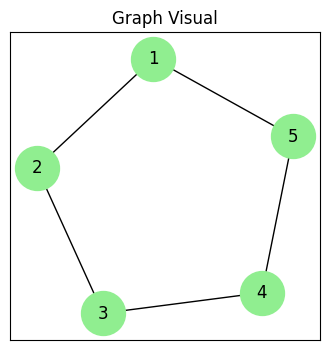

In [27]:
plot_simple_graph(
    nomantel_g,
    node_color="lightgreen",
    node_size=1000
)

By inspection we can see that the above graph has no triangle, therefore in contrast to Mantel's theorem, we should have $e \leq n^2 /4$. Indeed, $e=5$ and $n=5$, therefore $5 \leq 5^2 /4 \leq 6.25$. Notice that if we add an edge, regardless the edge we are adding, we are creating a triangle in the above pentagon-like graph. The relation $e \leq n^2/4$ still holds since Mantel's theorem does not guarantee that a graph with $e \leq n^2/4$ is triangle-free. It states that if $e > n^2/4$, then the graph must necessarily have at least one triangle. 

**Proof.**: We can prove the theorem by induction on $n$. Basically the theorem is stating that the maximum number of edges in a graph with $n$ vertices and no triangle is $n^2/4$. If $n=1,2$, the theorem is proved because $e$ is at most 1 and we cannot realize a triangle with 2 vertices. Let assume that $n > 2$ and $G$ be a triangle-free graph. Let define $uv$ an edge of $G$; by removing the $uv$ edge we find by definition another triangle-free graph with $n-2$ vertices, so by induction it has at most $(n-2)^2/4$ edges. The edge $uv$ has at most $n-2$ incident edges, otherwise there is a triangle, thus G can have at most:
$$
1 + (n-2) + (n-2)^2 / 4 = n^2 / 4
$$

## Graph Isomorphism

**Definition**: Let $G$ and $H$ two simple graphs. A **graph isomorphism** from $G$ to $H$ is a bijective map $\phi : V(G) \rightarrow V(H)$ that preserves edges, i.e. for any $u, v \in G$:
$$
(uv \in E(G) \Longleftrightarrow (\phi(u)\phi(v) \in E(H))
$$
We say that two graph are **isomorphic** if there is a graph isomorphism from $G$ to $H$. 

In the literature, some efficient algorithms to find whether two graphs are isomporhic are already documented. `networkx` already provides a method to check if two graphs are isomorphic, using the **VF2** algorithm, which is documented here: [An Improved Algorithm for Matching Large Graphs](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=f3e10bd7521ec6263a58fdaa4369dfe8ad50888c). However, it is useful, at least for *pedagogical purposes*, to implement a "brute-force" approach to find isomporhic maps between two graphs, if they exist. In the following, we consider some examples of simple, small graphs and apply such method (the approach is not computationally feasable for large graphs since it has a $O(n!\cdot m)$, where $n$ is the number of nodes and $m$ the number of edges). The idea is to:
1. Given two graphs $G_1 = (V_1, E_1)$ and $G_2= (V_2, E_2)$, find all possibile maps $V_1 \to V_2$. We will restrict to the simplest case of graphs with the same number of nodes.
2. Check each map and verify whether it presevers edges or not. We may stop as soon as we find a valid isomorphic map.

Let's start with the following simple example:

In [28]:
G1_iso1 = nx.Graph()
G1_iso1.add_nodes_from([1, 2, 3])
G1_iso1.add_edges_from([(1, 2), (2, 3)])

In [29]:
G2_iso1 = nx.Graph()
G2_iso1.add_nodes_from([1, 2, 3])
G2_iso1.add_edges_from([(1, 3), (2, 3)])

(None, None)

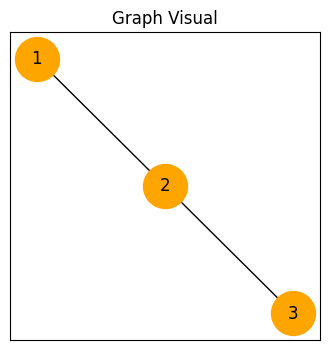

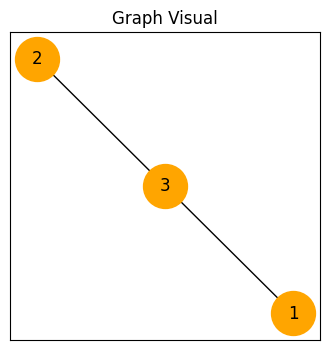

In [30]:
plot_simple_graph(
    G1_iso1, 
    node_color="orange",
    node_size=1000
), plot_simple_graph(
    G2_iso1, 
    node_color="orange",
    node_size=1000
)

The two graphs are isomorphic and a valid map may be:
$$
\begin{gather}
1 \to 1 \\
2 \to 3 \\
3 \to 2 \\
\end{gather}
$$
Indeed, 

In [31]:
nx.is_isomorphic(G1_iso1, G2_iso1)

True

Below, we have two functions: the first, `find_maps` accepts two networkx graphs and returns all possibile maps between their vertices (notice the use of `permutations` which introduce a factorial complexity). The second functions accepts again two networkx graphs, it calls the `find_maps` function and then it checks each map:

In [32]:
def find_maps(G1: nx.Graph(), G2: nx.Graph()) -> list[dict]:

    # Extracting nodes
    G1_nodes = list(G1.nodes)
    G2_nodes = list(G2.nodes)

    maps = []

    if len(G1_nodes) == len(G2_nodes):
        # Generate all possibile maps by combining elements from G1_nodes and all possibile permutations of G2_nodes
        for perm in list(itertools.permutations(G2_nodes)):
            maps.append(
                {G1_nodes[k]: perm[k] for k in range(len(G1_nodes))}
            )
    else:
        raise ValueError("Please provide two graphs with the same number of nodes")

    return maps

In [33]:
def find_graph_isomorphism(G1: nx.Graph(), G2: nx.Graph()) -> list[dict]:

    maps = find_maps(G1, G2)
    isomorphisms = []

    # Extracting edges
    G1_edges = list(G1.edges)
    G2_edges = list(G2.edges)

    # Cycling over maps
    for map in maps:
        # Boolean indicator 
        valid_map = True
        # Cycling over each edge and check whether the map preserve the edge
        for edge in G1_edges:
            # Hadling the case of undirectional graphs and mixed attributes
            mapped_edge = (map.get(edge[0]), map.get(edge[1]))
            mapped_edge_reverse = (map.get(edge[1]), map.get(edge[0]))

            # Valid if mapped edge is in the second graph
            if mapped_edge in G2_edges or mapped_edge_reverse in G2_edges:
                continue
            else:
                # If any edge fails, the map is invalid
                valid_map = False  
                # No need to check further edges for this map
                break  
            
            print(f"First Edge: {edge}, Mapped Edge {mapped_edge} found!")  # Debugging output
        
        if valid_map:  
            # Only append the map if all edges matched
            isomorphisms.append(map)

    return isomorphisms

In [34]:
find_graph_isomorphism(G1_iso1, G2_iso1)

[{1: 1, 2: 3, 3: 2}, {1: 2, 2: 3, 3: 1}]

The function has found two valid maps, i.e. isomorphisms mapping $V_1 to V_2$ and preserving edges. Therefore, the given graphs are isomorphic. Notice that there may exist more than one isomorphism between two graphs, since **isomorphism is concerned only with the topology of the graph** (how nodes are connected by edges), not the specific labels of the node. Consider the more complex case:

In [35]:
G1_iso2 = nx.Graph()
G1_iso2.add_nodes_from([1, 2, 3, 4, 5, 6])
G1_iso2.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)])

In [36]:
G2_iso2 = nx.Graph()
G2_iso2.add_nodes_from([1, 2, 3, "A", "B", "C"])
G2_iso2.add_edges_from([(1, "B"), (1, "C"), (2, "A"), (2, "C"), (3, "A"), (3, "B")])

(None, None)

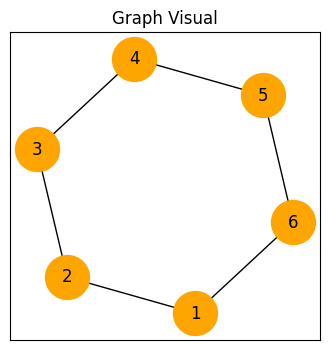

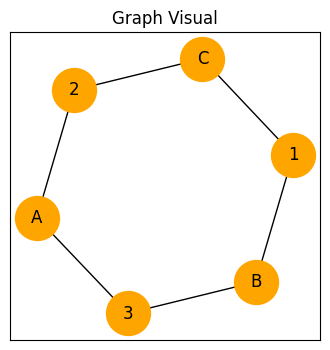

In [37]:
plot_simple_graph(
    G1_iso2, 
    node_color="orange",
    node_size=1000
), plot_simple_graph(
    G2_iso2, 
    node_color="orange",
    node_size=1000
)

In [38]:
nx.is_isomorphic(G1_iso2, G2_iso2)

True

In [39]:
find_graph_isomorphism(G1_iso2, G2_iso2)

[{1: 1, 2: 'B', 3: 3, 4: 'A', 5: 2, 6: 'C'},
 {1: 1, 2: 'C', 3: 2, 4: 'A', 5: 3, 6: 'B'},
 {1: 2, 2: 'A', 3: 3, 4: 'B', 5: 1, 6: 'C'},
 {1: 2, 2: 'C', 3: 1, 4: 'B', 5: 3, 6: 'A'},
 {1: 3, 2: 'A', 3: 2, 4: 'C', 5: 1, 6: 'B'},
 {1: 3, 2: 'B', 3: 1, 4: 'C', 5: 2, 6: 'A'},
 {1: 'A', 2: 2, 3: 'C', 4: 1, 5: 'B', 6: 3},
 {1: 'A', 2: 3, 3: 'B', 4: 1, 5: 'C', 6: 2},
 {1: 'B', 2: 1, 3: 'C', 4: 2, 5: 'A', 6: 3},
 {1: 'B', 2: 3, 3: 'A', 4: 2, 5: 'C', 6: 1},
 {1: 'C', 2: 1, 3: 'B', 4: 3, 5: 'A', 6: 2},
 {1: 'C', 2: 2, 3: 'A', 4: 3, 5: 'B', 6: 1}]

Again, the two graphs are isomorphic. In this case, there are a lot of possibile graph isomorphisms since we have a larger number of nodes. The number of isomorphisms between two graphs strictly depends on symmetrical and topological properties. The case depicted above is a rather particular case, since these are **cycle graphs** - which we will discuss shortly below. Cycle graphs are highly symmetrical and the number of isomorphisms is related to the so-called **automorphism group**. The automorphism groups is the set of all permutations of the graph's nodes that preserve its structure. For a $n$-cycle graph we have two types of symmetry:
1. **Rotational symmetry**: the graph is invariant under rotations. In case of $n$ nodes we have $n$ possibile rotations;
2. **Reflective symmetry**: the graph is invariant under reflections, i.e. flipping nodes w.r.t. an axis of reflection passing through two nodes. In case of $n$ nodes, there are $n$ reflections (the number of reflection axis is either $n$ or $n/2$ depending whether $n$ is odd or even respectively, and each axis produces two possibile reflections.
The total number of symmetries preserving the graph structure would be $n+n = 2n$. Each symmetry of the automorphism group is a valid isomorphism, therefore have $2n$ isomorphism between two $n$-cycle graph. Indeed, above we have found $ 6 \times 2 = 12$ isomorphisms between G1 and G2.

In [40]:
len(find_graph_isomorphism(G1_iso2, G2_iso2))

12

In [41]:
G1_iso3 = nx.Graph()
G1_iso3.add_nodes_from([1, 2, 3])
G1_iso3.add_edges_from([(1, 2), (2, 3), (3, 1)])

In [42]:
G2_iso3 = nx.Graph()
G2_iso3.add_nodes_from([1, 2, 3])
G2_iso3.add_edges_from([(2, 3), (3, 1)])

(None, None)

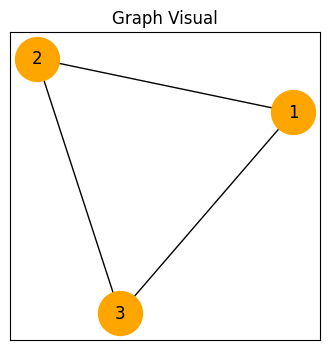

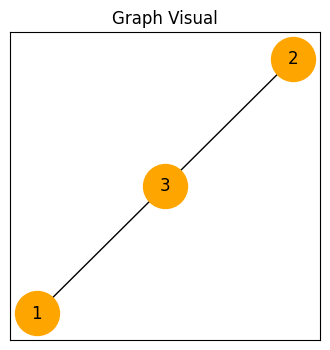

In [43]:
plot_simple_graph(
    G1_iso3, 
    node_color="orange",
    node_size=1000
), plot_simple_graph(
    G2_iso3, 
    node_color="orange",
    node_size=1000
)

Finally we have an example of two non-isomorphic graphs:

In [44]:
find_graph_isomorphism(G1_iso3, G2_iso3)

[]

In [45]:
nx.is_isomorphic(G1_iso3, G2_iso3)

False

**Preposition**: Let $G$ and $H$ be two simple graphs and $\phi$ a graph isomorphism $\phi : V(G) \rightarrow V(H)$. Then:
1. For $\forall v \in V(G)$, we have $\deg_G(v) = \deg_H(\phi(v))$
2. $|E(H)| = |E(G)|$
3. $|V(H)| = |V(G)|$

**Preposition (Re-labeling)**: Let $G$ be a simple graph. Let $S$ be a finite set such that $|S| = |V(G)|$. Then, there exists a simple graph $H$ that is isomorphic to $G$ and has $S$ as vertex set. 

### Cycle and Path graphs

When discussing above graph isomorphisms, we have briefly mentioned the existence of **cycle graphs**, that can be informally defined as graphs with a "circular shape".  Let give here a more formal definition:

**Definition**: For each $n > 1$, we define the $n$-th **cycle graph** $C_n$ to be a simple graph with
$$
(\{1, 2, ..., n \}, \{\{i, i+1\} | 1 \leq i < n \} \cup \{\{n, 1\}\}) 
$$
This graph has $n$ vertices and $n$ edges. An example is the $6$-cycle graph used in the previous section. Similarly, we can define:

**Definition**: For each $n \in \mathbb{N}$, the $n$-th **path graph** $P_n$ is a simple graph with
$$
(\{1, 2, ..., n \}, \{\{i, i+1\} | 1 \leq i < n \}) 
$$
This graph has $n$ vertices and $n-1$ edges (unlessn $n=0$, in which case it has 0 edges). Equivalently, a $n$-th path graph can be defined as a graph that becomes a cycle graph by adding the edge $n1$. 

`networkx` provide useful methods to check whether a graph contains a cycle or if a specific path can be identified in a given graph. For instance, let's consider the following graph:

In [46]:
C4 = nx.Graph()
C4.add_nodes_from([1, 2, 3, 4, 5, 6])
C4.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (5, 2), (6, 5)])

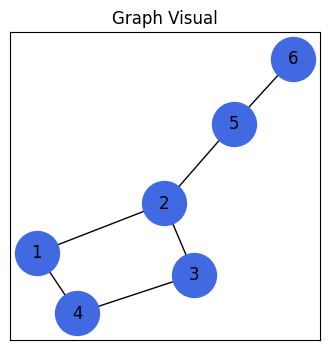

In [47]:
plot_simple_graph(
    C4, 
    node_color="royalblue",
    node_size=1000
)

In [48]:
nx.find_cycle(C4, orientation=None)

[(1, 2), (2, 3), (3, 4), (4, 1)]

The `nx.find_cycle` method identifies cycles within the graph. In the above example, we see that $(1, 2, 3, 4)$ forms a 4-th cycle. The `orientation` parameter allows specifying directions in case of directed graphs. For instance, if set to `reverse`,  every edge is traversed in the reverse direction. We have set it to `None`, since we are not dealing with directed graph and we don't need direction information. 
Similarly, we can use `is_path` to check whether a path exist inside the given graph:

In [49]:
# The path exist
nx.is_path(C4, [1, 2, 5])

True

In [50]:
# The path does not exist
nx.is_path(C4, [4, 2, 5])

False

Another interesting and more exotic graph is the so-called **Peterson graph**, named after Julius Peterson who discovered it in 1898. The graph is shown below:

In [51]:
G_peterson = nx.petersen_graph()

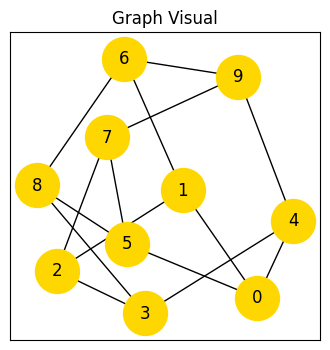

In [52]:
plot_simple_graph(
    G_peterson, 
    node_color="gold",
    node_size=1000
)

Usually, it is drawn as a pentagon with a pentagram inside. This graph has 10 vertices and 15 edges. It can be obtain by considering two disjoint 5-cycle graphs and connecting corresponding vertices with an edge. This graph is used in many areas of graph theory because of its interesting symmetrical and topological properties. For istance, it is an example of a **non-planar** graph, that is a graph which cannot be drawn in the plane without edge-crossing. 

## Subgraphs

**Definition**: A **subgraph** of $G = (V, E)$ is a simple graph $H = (U, F)$ where $U \subseteq V$ and $F \subseteq E$. 

According to the above definition, given a subset $U$ of $V$ there is a natural subgraph **induced** on $G$, which can be denotes as: 
$$
(U, E \cap P_2(U)
$$
i.e. the subgraph whose vertices are the elements of $U$ and edges are those edges of $G$ whose both endpoints belong to the set $U$. According to the definitions given above, we can say that $P_n$, the $n$-th path graph, is a subgraph of the cycle graph $C_n$. Similarly, we can say that $P_{n-1}$ is a subgraph of $P_n$, namely that induced by the subset $(1, 2, ..., n-1)$ on $V = (1, 2, 3, ..., n)$. On the other hand, $C_{n-1}$ is not a subgraph of $C_n$ since $C_{n-1}$ has the edge $1(n-1)$ which is missing in $C_n$. Below, let's write a function that allows to obtain the subgraph induced by a given subset of vertices:

In [53]:
def get_subgraph(G: nx.Graph(), U: list) -> nx.Graph():
    V = list(G.nodes)
    if not all([True if u in V else False for u in V]):
        raise ValueError("All vertices in U must belong to the graph!")
    else:
        G_sub = G
        G_sub.remove_nodes_from([v for v in V if v not in U])
    return G_sub

In [54]:
# Create a "complete" graph
G5 = nx.complete_graph(5) 

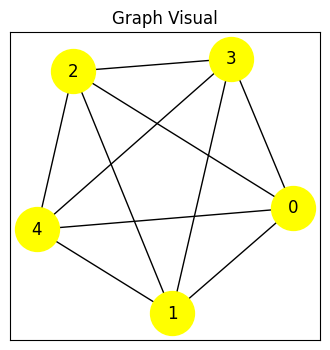

In [55]:
plot_simple_graph(
    G5, 
    node_color="yellow",
    node_size=1000
)

In [56]:
G5_sub = get_subgraph(G5, [1, 3, 4])

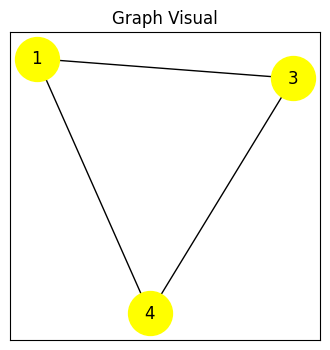

In [57]:
plot_simple_graph(
    G5_sub, 
    node_color="yellow",
    node_size=1000
)

Of course, there is an already implement method in `networkx`, `.subgraph()`, which can be called on the given graph:

In [58]:
G5_sub2 = G5.subgraph([1, 3, 4])

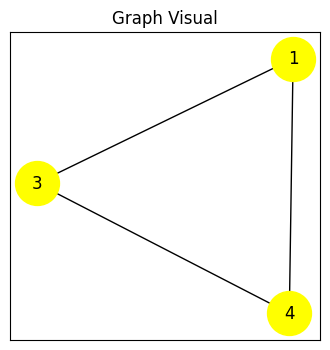

In [59]:
plot_simple_graph(
    G5_sub2, 
    node_color="yellow",
    node_size=1000
)

## Walks and Paths

**Definition**: Let $G=(V, E)$ be a simple graph. A **walk** $w$ in $G$ is a finite sequence of ($v_0, v_1, v_2, ..., v_k)$ of vertices of $G$, with $k\geq 0$ such that $v_0v_1, v_1v_2, ..., v_{k-1}v_k \in E$. The integer $k$ is called the **length** of $w$.

**Definition**: Let $G=(V, E)$ be a simple graph. A **path** $p$ is a walk $w$ in $G$ whose vertices are distinct. 

Therefore, roughly speaking, a path is just a walk without repeated vertices. If you walk on a graph, you can always turn the walk into a path by "removing" loops. In addition, 

**Preposition**: Let $G=(V, E)$ be a simple graph. Let $u$ and $v$ be two vertices of $G$ and let $w = (x_0, x_1, ..., x_k)$ be a walk from $u$ to $v$. Let assume that $w$ is not a path. Then, there exists a walk from $u$ to $v$ whose length is smaller than $k$. 

*Proof.* The proof is straightforward. Since $w$ is not a path, at least two of its vertices are equal. Therefore, it exists $i < j$ such that $x_i=x_j$. Hence, if we remove the part between these two vertices, we end up with
$$
\left(x_0, x_1, ...x_{i}, x_{j+1},...x_k\right)
$$
The first tuple $(x_0, ..., x_i)$ is of length $i$, the remaining one is of length $k-j$. Therefore, the walk from $u$ to $v$ without the repeated vertices will be of length $i + (k-j) \leq j + (k-j ) = k$.

A corollary to the above preposition is that, when there is a walk on graph there is always a path of length $\leq k$. 

Above, we have seen that the `networkx` library provide a simple method to check whether a collection of vertices of a graph is a path (the `is_path` method). Now, let' code a function that returns all possible paths from a vertices $u$ to a vertices $v$ in a graph:

In [60]:
G_p = nx.Graph()
G_p.add_nodes_from([1, 2, 3, 4, 5, 6])
G_p.add_edges_from([(1, 2), (2, 3), (2, 4), (3, 6), (4, 6), (5, 3)])

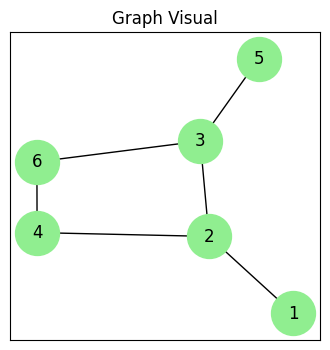

In [61]:
plot_simple_graph(
    G_p, 
    node_color="lightgreen",
    node_size=1000
)

First of all, we may try a **random** approach: we start walking on the graph, moving from one node to its neighbor, picking one of its edge at random, until we find the ending point. At each iteration, we will end up with just one possible, if it exists, path from $v$ to $v$. However, if the graph is not so big, we may iterate the process $N$ times and hopefully find all possible paths in few iterations. Below, a possibile implementation of this approach:

In [62]:
def walk_on_G(G: nx.Graph, v, u) -> list:
    '''
    Function to "walk" on a graph G and find vertices connecting u to v, randomly
    picking edges

    Args:
        G (nx.Graph): a simple networkx Graph
        v: starting vertex
        u: ending vertex
    Returns:
        v_visited (list): the list of visited vertices in going from u to v
    '''

    # Initializing v_visited to the starting point
    v_visited = [v]
    v_i = v

    # Cycling while we don't find the ending point
    while v_i != u:
        # Get the neighbor list
        neighbor_list = [ n for n in list(G.neighbors(v_i)) ]

        if u in neighbor_list:
            # If we the neighbor is already u, we break
            v_i = u
        else:
            # Get the degree of the visiting node
            deg_v_i = G.degree(v_i)

            #We pick a neigbor at random
            j = np.random.randint(deg_v_i)
            # We need to pick a neighbor not already visited
            available_nodes = list(set(neighbor_list)-set(v_visited))

            if len(available_nodes) == 0:
                # break if we have already visited all nodes without find the last endpint point
                v_visited = []
                break
            else:
                ind = min(j, len(available_nodes)-1)
                v_i = available_nodes[ind]
        # Appending new visited node
        v_visited.append(v_i)

    return v_visited

In [63]:
walk_on_G(G_p, 1, 5)

[1, 2, 4, 6, 3, 5]

In [64]:
# Iterating multiple times
all_paths = []
N = 50
for i in range(N):
    all_paths.append(tuple(walk_on_G(G_p, 1, 5)))

In [65]:
set(all_paths)

{(1, 2, 3, 5), (1, 2, 4, 6, 3, 5)}

For instance, we the example given above, we see that already in 50 steps we have found the two possibile paths from 1 to 5, namely:

In [66]:
distinct_paths = list(set(all_paths))
distinct_paths[0]

(1, 2, 3, 5)

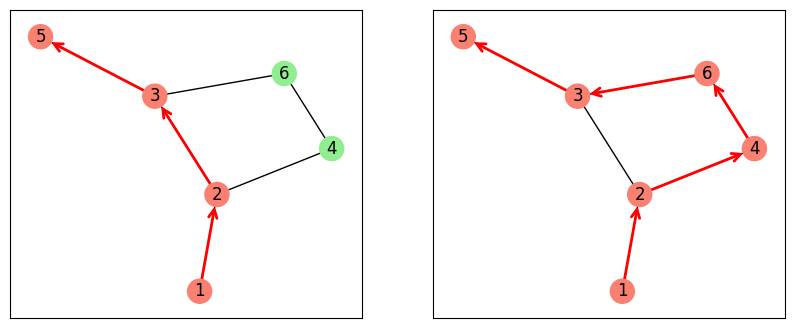

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

path1_color = ["salmon" if x in distinct_paths[0] else "lightgreen" for x in G_p.nodes]
path2_color = ["salmon" if x in distinct_paths[1] else "lightgreen" for x in G_p.nodes]

# Draw edges with arrows for the path
path_edges1 = [(distinct_paths[0][i], distinct_paths[0][i + 1]) for i in range(len(distinct_paths[0]) - 1)]
path_edges2 = [(distinct_paths[1][i], distinct_paths[1][i + 1]) for i in range(len(distinct_paths[1]) - 1)]
# Node positions
pos = nx.spring_layout(G_p)

# Draw the entire graph (nodes and edges)
nx.draw_networkx(
    G_p,
    pos=pos,
    node_color=path1_color,
    edge_color="black",  # Default edge color for edges outside the path
    with_labels=True,
    ax=ax[0],
)

nx.draw_networkx(
    G_p,
    pos=pos,
    node_color=path2_color,
    edge_color="black",  # Default edge color for edges outside the path
    with_labels=True,
    ax=ax[1],
)


# Overlay the path edges with arrows and a different color
nx.draw_networkx_edges(
    G_p,
    pos=pos,
    edgelist=path_edges1,
    edge_color="red",
    arrows=True,
    arrowstyle="->",
    arrowsize=15,
    width=2,  # Thicker lines for path edges
    ax=ax[0],
)

nx.draw_networkx_edges(
    G_p,
    pos=pos,
    edgelist=path_edges2,
    edge_color="red",
    arrows=True,
    arrowstyle="->",
    arrowsize=15,
    width=2,  # Thicker lines for path edges
    ax=ax[1],
)

### Depth-First Search Algorithm

The approach given above have clearly some drawbacks. For example, picking neighbors at random may be extremely inefficient when finding paths in big graphs with a lot of nodes. In addition, when a walk reach a "dead node", i.e. a node without unvisited neighbors, it does't **backtrack** to find other paths (that's why we have called the function multiple times to find as many distinct paths as possible, with the additional drawback of multiple redudant calculations). Of course, the problem of finding paths between two vertices is a well-known problem, already addressed efficiently in the literature. One of the most important algorithm to solve this problem is the so-called **<span style="color: red">Depth-First Search</span>**, **DFS**. The **DFS** algorithm is one of the most important algorithm in graph theory and can be applied to solve many problems. We will see other applications of the DFS algorithm later. 

The algorithm is pretty simple and it actually arises from few modifications of the randomized approach given above. We may summarize the method as follows:
1. We pick the initial node;
2. We start exploring the graph moving from one node to a neighboring node, storing both the visited nodes as well as the current search path (what was missing above);
3. As soon as we reach the ending point, we **backtrack** and look for another path.

Interstingly, the algorithm can be implemented **recursively** (they exists also non-recursively implementations): when moving from node $v$ (the currently discovered) to node $v_1$, if $v_1$ is not labeled as discovered, we are actually applying DFS itself to $v_1$ and so on. 

Below, an implementation of DFS to find all paths from $v$ to $u$:

In [68]:
def DFS_paths(G: nx.Graph(), v, u, path=None) -> list:
    """
    DFS to find all paths from node v to node u.

    Args:
        G (nx.Graph): a simple NetworkX graph
        v: path starting vertex
        u: ending vertex
        path: Current path (used for recursion)

    Returns:
        list[list]: A list of all paths from v to u
    """
    if path is None:
        path = []

    # Append the current node to the path
    path = path + [v]  

    # Return the completed path
    if v == u:
        return [path]  

    # Return empty if the node is not in the graph
    if v not in G:
        return []  

    paths = []
    # Cycling over neighbors of v
    for neighbor in G.neighbors(v):
        # Avoid cycles
        if neighbor not in path:  
            # Recursively call DFS on neighbor of v, passing the already visited node as the current search path
            new_paths = DFS_paths(G, neighbor, u, path)

            # Extending paths with found paths
            paths.extend(new_paths)

    return paths

In [69]:
DFS_paths(G_p, 1, 5)

[[1, 2, 3, 5], [1, 2, 4, 6, 3, 5]]

Since to find all paths we are basically traversing the entire graph, the DFS algorithm has the $O(|V|+|E|)$ time complexity, with an additional space complexity of $O(|V|)$ for stacking the vertices of the search path. The main advantage of the DFS algorithm is that it is deterministic and it ensures that all paths are found. However, for very large graphs, DFS may be inefficient too and a randomized approach may be more suitable if we are not interested in finding all paths but just **one** path. 

`networkx` shines again and already provides a method to compute all simple paths in a graph given the starting and ending nodes. The method is called `.all_simple_paths` and it additionally allows specifying through the `cutoff` parameter a max depth to stop the search, to retrieve all paths of lengths $k \leq \text{cutoff}$.

In [70]:
for path in nx.all_simple_paths(G_p, source=1, target=5):
    print(path)

[1, 2, 3, 5]
[1, 2, 4, 6, 3, 5]


In [71]:
G_p1 = nx.complete_graph(6)

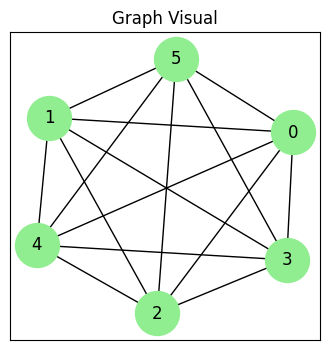

In [72]:
plot_simple_graph(
    G_p1, 
    node_color="lightgreen",
    node_size=1000
)

In [73]:
for path in nx.all_simple_paths(G_p1, source=0, target=3, cutoff=2):
    print(path)

[0, 1, 3]
[0, 2, 3]
[0, 3]
[0, 4, 3]
[0, 5, 3]


## Connectedness

In the following, we will use the concepts of walks and paths to define a certain **equivalence relation** on the vertex set $V$ of any graph $G$. 

**Definition**: Let $G=(V, E)$ be a simple graph. We say that two vertices $u, v \in V$ are **path-connected** if there exists a walk from $u$ to $v$ in $G$. We say that $u$ and $v$ are related by a binary relation called **path-connectedness**, denoted as $u \simeq_G v$.

**Preposition**: The relation $\simeq_G$ is an equivalence relation.

*Proof*: To prove that $\simeq_G$ is an equivalence relation we need to prove that it is symmetric, reflexive and transitive:
1. Symmetry: If $u \simeq_G v$ then  $v \simeq_G u$, indeed we can always reverse the walk and go from $v$ to $u$;
2. Reflexivity: $u \simeq_G u$ is the trivial walk from $u$ to $u$;
3. Transitivity: If $u \simeq_G v$ and $v \simeq_G z$ then $u \simeq_G z$. The walk going from $u$ to $z$ is the combination of the walk from $u$ to $v$ and from $v$ to $z$.

Such equivalence relation allows introducing one of the most important concept in graph theory, that of **connected components**:

**Definition**: Let $G=(V, E)$ be a simple graph. The equivalence classes of the equivalence relation $\simeq_G$ are called the **connected components** (or simply "components") of $G$. We say that $G$ is **connected** if $G$ has exactly one component. 

Informally, we may say that connected components of a graph $G$ are subgraphs that are not part of any larger subgraph. As consequence, each vertex in a connected components is reachable from every other vertex in the component. 

To find connected components of a graph we can use again the **DFS** algorithm. Let consider the following graph:

In [74]:
G_cc = nx.Graph()
G_cc.add_nodes_from([1, 2, 3, 4, 5, 6])
G_cc.add_edges_from([(3, 4), (3, 2), (1, 6)])

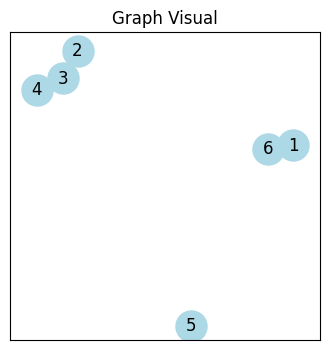

In [75]:
plot_simple_graph(
    G_cc,
    node_color="lightblue",
    node_size=500,
    edge_color="blue"
)

The connected components of this graph are: $(1, 6), (2, 3, 4)$ and $(5)$, because we have $1 \simeq_G 6$ and $2 \simeq_G 3 \simeq_G 4$, while $5$ is a single disconnected node. To programmatically find these components we may proceed as follows:
1. Pick a node, e.g. $1$.
2. We start walking from $1$ and exploring the graph node by node, labeling each visited node as "visited". In this case, we will stop immediately since the node is disconnected from all the remaining graph;
3. We then pick 2 and start again a DFS to traverse the graph;
4. Once visited all node 2, 3, 4. We will have to pick another node not already visited, namely 5 and start a DFS again.

Ultimately, **<span style="color: red">the number of connected components will be given by the number of times the DFS is called at each iteration</span>** (not considering calls occuring recursively when exploring each component). Below, we slighlty modify the function coded above to find all paths using DFS and then code a function returning all connected components of a graph:

In [76]:
def DFS(G: nx.Graph(), v, visited=None) -> list:
    '''
    A standard recursively DFS algorithm that traverse a graph,
    tracking the already visited node

    Args:
        G (nx.Graph): a simple undirected NetworkX graph
        v: a starting node
        visited (None): a set of already visited nodes. Default is None. Inside, initiliazed to an empty list

    Returns:
        list: a list of all visited nodes
    '''
    
    if visited is None:
        visited = []

    # If v is already visited, return the visited nodes
    if v in visited:
        return visited

    visited.append(v)

    # Cycling over neighbors of v and call recursively DFS 
    for u in G.neighbors(v):
        if u not in visited:
            DFS(G, u, visited)

    return visited

In [77]:
# For instance, calling DFS on node 2 in the example above, gives 
DFS(G_cc, 2)

[2, 3, 4]

$(2, 3, 4)$ is the complete list of nodes visited when applying DFS to node 2. Now, to find all connected components we will simply cycle over the graph nodes and keep tracks of all already visited nodes when applying each DFS call. That is, 

In [78]:
def find_connected_components(G: nx.Graph()):
    """
    Generator that yields connected components of a graph G as lists of nodes.
    
    Args:
        G (nx.Graph):a simple undirected NetworkX graph

    Yields:
        list: A connected component of G as a list of nodes.
    """
    # Use a set for faster membership checks
    visited = set()  

    for v in G.nodes():
        if v not in visited:
            # Perform DFS to get the connected component starting from node v
            component = DFS(G, v, visited=[])
            # Mark all nodes in this component as visited
            visited.update(component)  
            yield component  # Yield the connected component

In [79]:
cc = find_connected_components(G_cc)

We have used a *generator* above (using the Python `yield`), which avoids the need to store all connected components in memory at once, "yielding" one connected component at a time as it's discovered. This is particularly efficient in case of large graphs. A similar implementation is provided by `networkx`. We see that our function as found 3 connected components as expected:

In [80]:
cc_list = list(cc)

In [81]:
print(f"The number of connected components is: {len(cc_list)}")
print(f"The connected components are: {cc_list}")

The number of connected components is: 3
The connected components are: [[1, 6], [2, 3, 4], [5]]


As mentioned above, we can use the networkx method `nx.connected_components()`:

In [82]:
cc_nx = nx.connected_components(G_cc)

In [83]:
list(cc_nx)

[{1, 6}, {2, 3, 4}, {5}]

### An example of Connected Components application

Consider the following scenario: We have several IoT devices equipped with two distinct APIs that track activities and collect data. Unfortunately, these APIs generate different device IDs for the same physical device, making it impossible to analyze data from both APIs for the same device. In addition, device IDs are not static, but they can change, meaning that a single device can be tracked under a collection of device ids over time. Now, imagine we have developed a robust algorithm that links two device IDs if they share the same IP address within predefined time windows. Our goal is to group device IDs together (groups that may collect id from the same physical IoT device but also distinct IoT devices, which may share the same IP as well). This results in the following dataset:

In [87]:
dataset = pd.read_csv("../datasets/device-ip-match.csv")

In [88]:
dataset

,device1,device2,p
0,device1_64,device2_102,0.97
1,device1_3,device2_173,0.93
2,device1_28,device2_169,0.85
3,device1_23,device2_154,0.17
4,device1_74,device2_127,0.49
...,...,...,...
95,device1_39,device2_187,0.55
96,device1_100,device2_156,0.43
97,device1_53,device2_106,0.01
98,device1_98,device2_200,0.08


We can approach the problem using graph theory as follows. Given $D_1$ and $D_2$ the sets of device id 1 and 2 respectively, we set $V=D_1 \cup D_2$ and consider the above dataset as the set of graph edges. 

*Note*: this is typical example of *many-to-many relationship* between two sets, which is generally tackled with graph theory.

In [170]:
nodes = set(dataset["device1"]).union(set(dataset["device2"]))

In [171]:
edges = [(row["device1"], row["device2"], row["p"]) for _, row in dataset.iterrows()]

Notice that the dataset comes with an additional column, called `p`, reporting a value between 0 and 1. Let consider this value as a measure of match "goodness" between two distinct device ID. We can thus build a graph where edges are not simple "present" or not, but they are *weighted*. `networkx` allows building **weighted graphs** easily with:

In [172]:
device_graph = nx.Graph()
device_graph.add_nodes_from(nodes)
device_graph.add_weighted_edges_from(edges)

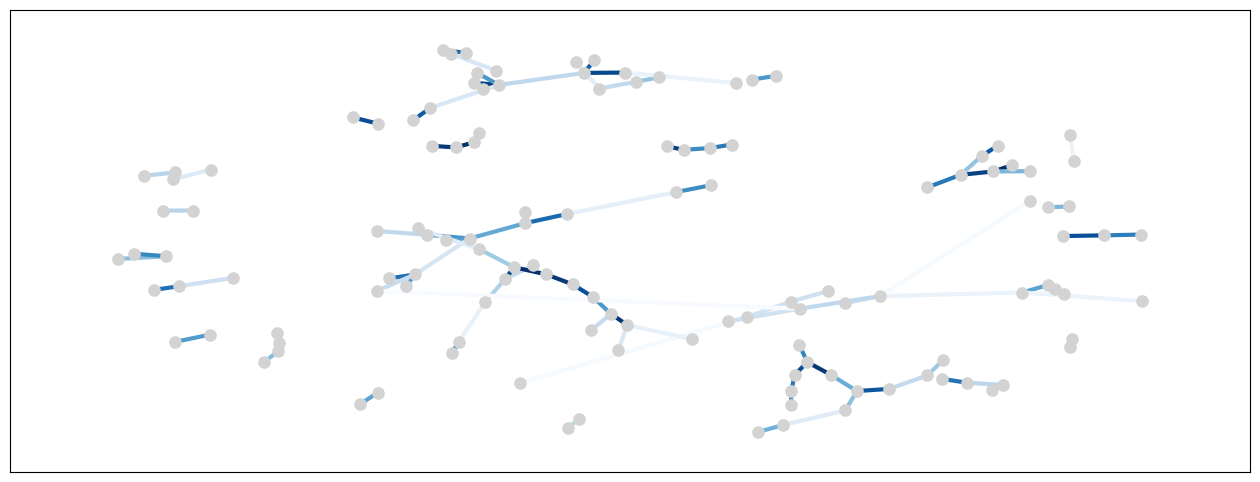

In [174]:
# Extract edge weights for coloring and labeling
plt_edges, plt_weights = zip(*nx.get_edge_attributes(device_graph, 'weight').items())

# Blue color scale
cmap = plt.cm.Blues  

# Get positions for node
# Spring layout for better visualization
pos = nx.spring_layout(device_graph, seed=42)  

# Plot the graph
fig, ax = plt.subplots(figsize=(16, 6))

# Draw nodes and labels
nx.draw_networkx_nodes(device_graph, pos, node_size=65, node_color="lightgray", ax=ax)

# Draw edges with color map based on weights
nx.draw_networkx_edges(
    device_graph, pos, edgelist=plt_edges, edge_color=plt_weights, edge_cmap=cmap, 
    edge_vmin=min(plt_weights), edge_vmax=max(plt_weights), width=3
)

plt.show()

Of course, in real-world applications, we may need to clean the dataset, e.g. by removing edges we do not consider relevant (for instance, setting a cutoff for the edge weight `p`). However, for the purpose of this exercise, let's consider the above graph as it is. Our problem translates into finding the connected components of the above graph. Therefore:

In [175]:
device_cc_gen = nx.connected_components(device_graph)

In [176]:
device_cc = list(device_cc_gen)

In [177]:
device_cc[:2]

[{'device1_18',
  'device1_22',
  'device1_29',
  'device1_54',
  'device1_55',
  'device1_85',
  'device2_134',
  'device2_186',
  'device2_188',
  'device2_194'},
 {'device1_11',
  'device1_16',
  'device1_17',
  'device1_23',
  'device1_27',
  'device1_46',
  'device1_51',
  'device1_70',
  'device1_74',
  'device1_8',
  'device1_80',
  'device1_9',
  'device2_114',
  'device2_124',
  'device2_125',
  'device2_127',
  'device2_130',
  'device2_143',
  'device2_144',
  'device2_154',
  'device2_168'}]

In [178]:
print(f"The number of connected components is: {len(device_cc)}")

The number of connected components is: 28


We have found 28 connnected components. Let visualize these components:

In [179]:
enum_cc = [(i, j) for i in range(len(device_cc)) for j in list(device_cc[i])]

In [180]:
# Create a colormap with len(cc) distinct colors
cmap = plt.cm.get_cmap('tab20', len(device_cc))  

# Create a dictionary mapping numbers 0 to 27 to corresponding colors
color_dict = {i: mcolors.to_hex(cmap(i)) for i in range(len(device_cc))}

/var/folders/xh/7gjfwn1156386st5775zf6cc0000gn/T/ipykernel_17491/1714802617.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(device_cc))


In [181]:
node_color_dict = {i[1]: color_dict[i[0]] for i in enum_cc}

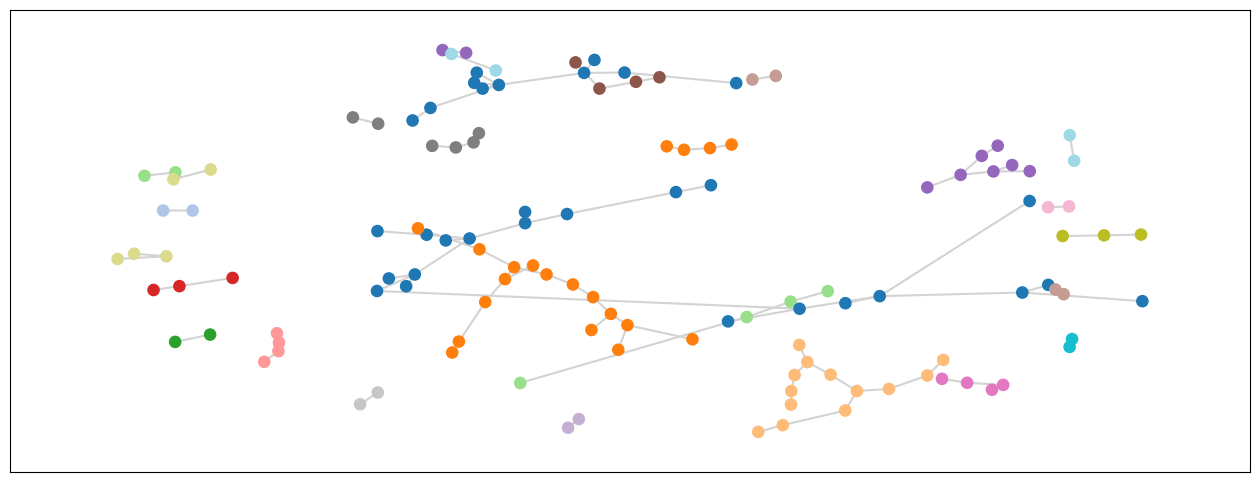

In [182]:
# Get positions for node
# Spring layout for better visualization
pos = nx.spring_layout(device_graph, seed=42)  

# Plot the graph
fig, ax = plt.subplots(figsize=(16, 6))

node_colors = [node_color_dict[node] for node in device_graph.nodes()]

# Draw nodes and labels
nx.draw_networkx_nodes(device_graph, pos, node_size=65, node_color=node_colors, ax=ax)
nx.draw_networkx_edges(
    device_graph, pos, edgelist=device_graph.edges(), edge_color="lightgrey", width=1.5
)

plt.show()